In [ ]:
%matplotlib inline 
import random
import numpy as np
import numpy
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pyplot
from sklearn import metrics 
import matplotlib.pyplot as plt     

In [ ]:
df = pd.read_csv(r'Superbowl_2022.csv', sep=",",engine='python')
df = df.drop(columns = ['Week','Day','Opp','Date','OT','Win Flag','Favourite Flag'])
df
#'Expected Points Sum','Opposition Points Scored','Points Scored'
#df_scaled = df.copy()
#for column in df_scaled.columns:
#    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
#df_scaled
      


,TEAM,Opposition Points Scored,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Offense,Defense,Sp. Tms,Expected Points Sum,Points Scored
0,CINCINNATI,24,20,366,217,149,0,24,403,336,67,1,6.16,-2.90,-1.79,1.47,27
1,CINCINNATI,20,14,248,179,69,4,16,206,83,123,1,-16.14,11.15,1.51,-3.48,17
2,CINCINNATI,10,12,268,172,96,1,21,342,297,45,2,0.17,8.46,6.09,14.72,24
3,CINCINNATI,21,21,420,342,78,0,21,341,202,139,0,20.93,-12.38,-6.50,2.05,24
4,CINCINNATI,25,18,367,264,103,2,21,466,333,133,1,3.92,-9.92,3.51,-2.49,22
5,CINCINNATI,11,20,398,256,142,1,15,228,192,36,1,16.60,8.89,-0.46,25.03,34
6,CINCINNATI,17,19,520,409,111,1,20,393,278,115,0,19.58,2.69,-2.13,20.14,41
7,CINCINNATI,34,18,318,277,41,1,32,511,414,97,3,3.26,-8.01,4.33,-0.42,31
8,CINCINNATI,41,25,348,263,85,3,14,361,208,153,0,-15.34,-14.44,4.50,-25.28,16
9,CINCINNATI,13,23,288,129,159,1,13,278,206,72,2,6.50,6.44,5.53,18.47,32


In [ ]:
LA = pd.DataFrame(df.loc[df['TEAM']=='LA'])
LA_drop = LA.drop(columns = ['TEAM','Expected Points Sum','Opposition Points Scored','Points Scored'])
#LA_Score = pd.DataFrame(LA.Score)
#LA = LA.drop(columns=['Score'])
Cincinnati = pd.DataFrame(df.loc[df['TEAM']=='CINCINNATI'])
Cincinnati_drop = Cincinnati.drop(columns = ['TEAM','Expected Points Sum','Opposition Points Scored','Points Scored'])
#Cincinnati_Score = pd.DataFrame(Cincinnati.Score)
#Cincinnati = Cincinnati.drop(columns=['Score'])
LA_drop = LA_drop.reset_index()
LA_drop = LA_drop.drop(columns = ['index'])

LA_scaled = LA_drop.copy() 
for column in LA_scaled.columns:
    LA_scaled[column] = LA_scaled[column]  / LA_scaled[column].abs().max()
LA_scaled


Cincinnati_scaled = Cincinnati_drop.copy()
for column in Cincinnati_scaled.columns:
    Cincinnati_scaled[column] = Cincinnati_scaled[column]  / Cincinnati_scaled[column].abs().max()
LA_scaled

,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Offense,Defense,Sp. Tms
0,0.692308,0.810924,0.871508,0.448485,0.00,0.888889,0.692473,0.457421,0.620370,0.50,0.972072,0.039134,-0.064919
1,0.807692,0.779412,0.754190,0.612121,0.50,0.814815,0.761290,0.596107,0.504630,0.50,0.320270,-0.059392,-0.385768
2,0.846154,0.855042,0.924581,0.460606,0.00,1.000000,0.959140,1.000000,0.162037,0.00,0.926126,-0.697514,0.428215
3,0.923077,0.842437,0.782123,0.733333,0.50,1.000000,1.000000,0.605839,1.000000,0.00,0.402703,-1.000000,-0.329588
4,0.923077,1.000000,1.000000,0.715152,0.25,0.814815,0.761290,0.637470,0.425926,0.50,0.619820,-0.308932,-0.006242
5,0.846154,0.766807,0.653631,0.793939,0.50,0.777778,0.561290,0.489051,0.277778,1.00,0.343694,0.877532,-0.119850
6,0.846154,0.785714,0.913408,0.284848,0.00,0.703704,0.892473,0.676399,0.634259,0.50,0.904505,-0.152855,-0.872659
7,1.000000,0.981092,0.843575,1.000000,0.00,0.666667,0.694624,0.678832,0.203704,0.25,1.000000,-0.080571,-1.000000
8,0.846154,0.728992,0.706704,0.569697,0.50,0.592593,0.417204,0.304136,0.319444,0.25,-0.530631,-0.052947,-0.066167
9,0.615385,0.584034,0.631285,0.315152,0.50,0.740741,0.720430,0.435523,0.722222,0.00,-0.323423,-0.521639,-0.087391


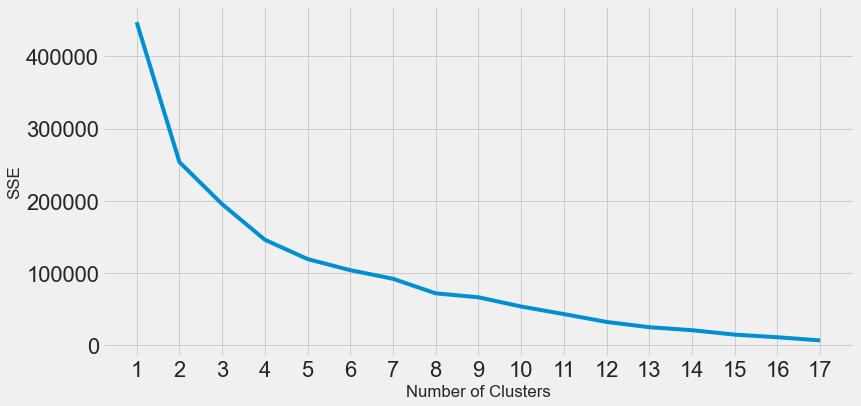

In [ ]:
sse = []
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}
for k in range(1, 18):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(LA)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 18), sse)
plt.xticks(range(1, 18))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
random.seed(10)

In [ ]:
Cincinnati_scaled_columns = Cincinnati_scaled.columns.tolist()
Cincinnati_scaled_columns = ['Deff_1stD','Deff_TotYd','Deff_PassY','Deff_RushY','Deff_TO','Off_1stD','Off_TotYd',
 'Off_PassY',
 'Off_RushY',
 'Off_TO',
 'Offense',
 'Defense',
 'Sp. Tms']

                  
Cincinnati_scaled = Cincinnati_scaled[Cincinnati_scaled_columns]
                  
Cincinnati_scaled['Offense']  = (Cincinnati_scaled['Offense']*(-1))
Cincinnati_scaled['Defense']  = (Cincinnati_scaled['Defense']*(-1))
Cincinnati_scaled['Sp. Tms']  = (Cincinnati_scaled['Sp. Tms']*(-1))
Cincinnati_scaled
                  

,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Offense,Defense,Sp. Tms
0,0.75000,0.788650,0.811594,0.326829,0.333333,0.606061,0.636522,0.435743,0.752525,0.00,-0.172404,0.115400,0.167603
1,0.50000,0.403131,0.200483,0.600000,0.333333,0.424242,0.431304,0.359438,0.348485,1.00,0.451721,-0.443693,-0.141386
2,0.65625,0.669276,0.717391,0.219512,0.666667,0.363636,0.466087,0.345382,0.484848,0.25,-0.004758,-0.336649,-0.570225
3,0.65625,0.667319,0.487923,0.678049,0.000000,0.636364,0.730435,0.686747,0.393939,0.00,-0.585782,0.492638,0.608614
4,0.65625,0.911937,0.804348,0.648780,0.333333,0.545455,0.638261,0.530120,0.520202,0.50,-0.109712,0.394747,-0.328652
5,0.46875,0.446184,0.463768,0.175610,0.333333,0.606061,0.692174,0.514056,0.717172,0.25,-0.464596,-0.353760,0.043071
6,0.62500,0.769080,0.671498,0.560976,0.000000,0.575758,0.904348,0.821285,0.560606,0.25,-0.547999,-0.107043,0.199438
7,1.00000,1.000000,1.000000,0.473171,1.000000,0.545455,0.553043,0.556225,0.207071,0.25,-0.091240,0.318743,-0.405431
8,0.43750,0.706458,0.502415,0.746341,0.000000,0.757576,0.605217,0.528112,0.429293,0.75,0.429331,0.574612,-0.421348
9,0.40625,0.544031,0.497585,0.351220,0.666667,0.696970,0.500870,0.259036,0.803030,0.25,-0.181920,-0.256267,-0.517790


In [ ]:
from sklearn.cluster import KMeans
knn_LA = KMeans(n_clusters=3,random_state=3425)
knn_LA.fit(LA_scaled)
Cincinnati_match = knn_LA.predict(Cincinnati_scaled)
values, counts = np.unique(Cincinnati_match, return_counts=True)
print(values)
print(counts)
LA_with_clusters = LA.copy() 
LA_with_clusters['Cluster'] = Cincinnati_match
LA_cluster_means = LA_with_clusters.groupby(['Cluster']).mean()
LA_cluster_means
LA_cluster_means

[0 1 2]
[ 2 12  6]


,Opposition Points Scored,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Offense,Defense,Sp. Tms,Expected Points Sum,Points Scored
Cluster,,,,,,,,,,,,,,,,
0,23.500000,18.500000,359.000000,259.500000,99.500000,2.500000,21.000000,330.0,254.000000,76.000000,2.500000,0.855000,7.200000,-0.135,17.500000,33.000000
1,20.416667,21.583333,380.000000,279.666667,100.333333,1.250000,18.750000,307.5,228.916667,78.583333,1.333333,7.764167,-1.125833,-0.920,11.916667,26.333333
2,22.500000,20.666667,374.333333,280.500000,93.833333,1.333333,21.666667,389.5,252.666667,136.833333,1.500000,11.038333,-3.906667,-1.425,10.166667,27.000000


In [ ]:
LA_scaled_columns = LA_scaled.columns.tolist()
LA_scaled_columns = ['Deff_1stD','Deff_TotYd','Deff_PassY','Deff_RushY','Deff_TO','Off_1stD','Off_TotYd',
 'Off_PassY',
 'Off_RushY',
 'Off_TO',
 'Offense',
 'Defense',
 'Sp. Tms']

                  
LA_scaled = LA_scaled[LA_scaled_columns]
                  
LA_scaled['Offense']  = (LA_scaled['Offense']*(-1))
LA_scaled['Defense']  = (LA_scaled['Defense']*(-1))
LA_scaled['Sp. Tms']  = (LA_scaled['Sp. Tms']*(-1))
LA_scaled
                  

,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Offense,Defense,Sp. Tms
0,0.888889,0.692473,0.457421,0.620370,0.50,0.692308,0.810924,0.871508,0.448485,0.00,-0.972072,-0.039134,0.064919
1,0.814815,0.761290,0.596107,0.504630,0.50,0.807692,0.779412,0.754190,0.612121,0.50,-0.320270,0.059392,0.385768
2,1.000000,0.959140,1.000000,0.162037,0.00,0.846154,0.855042,0.924581,0.460606,0.00,-0.926126,0.697514,-0.428215
3,1.000000,1.000000,0.605839,1.000000,0.00,0.923077,0.842437,0.782123,0.733333,0.50,-0.402703,1.000000,0.329588
4,0.814815,0.761290,0.637470,0.425926,0.50,0.923077,1.000000,1.000000,0.715152,0.25,-0.619820,0.308932,0.006242
5,0.777778,0.561290,0.489051,0.277778,1.00,0.846154,0.766807,0.653631,0.793939,0.50,-0.343694,-0.877532,0.119850
6,0.703704,0.892473,0.676399,0.634259,0.50,0.846154,0.785714,0.913408,0.284848,0.00,-0.904505,0.152855,0.872659
7,0.666667,0.694624,0.678832,0.203704,0.25,1.000000,0.981092,0.843575,1.000000,0.00,-1.000000,0.080571,1.000000
8,0.592593,0.417204,0.304136,0.319444,0.25,0.846154,0.728992,0.706704,0.569697,0.50,0.530631,0.052947,0.066167
9,0.740741,0.720430,0.435523,0.722222,0.00,0.615385,0.584034,0.631285,0.315152,0.50,0.323423,0.521639,0.087391


In [ ]:
knn_Cincinnati = KMeans(n_clusters=3,random_state=3425)
knn_Cincinnati.fit(Cincinnati_scaled)
LA_match = knn_Cincinnati.predict(LA_scaled)
values, counts = np.unique(LA_match, return_counts=True)
print(values)
print(counts)
Cincinnati_with_clusters = Cincinnati.copy() 
Cincinnati_with_clusters['Cluster'] = LA_match
Cincinnati_cluster_means = Cincinnati_with_clusters.groupby(['Cluster']).mean()
Cincinnati_cluster_means


[0 1 2]
[ 5  5 10]


,Opposition Points Scored,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Deff_1stD,Deff_TotYd,Deff_PassY,Deff_RushY,Deff_TO,Offense,Defense,Sp. Tms,Expected Points Sum,Points Scored
Cluster,,,,,,,,,,,,,,,,
0,15.4,20.0,375.0,279.0,96.0,0.4,18.8,318.4,228.2,90.2,1.6,10.910,1.412,1.344,13.666,27.0
1,23.2,21.4,332.6,216.4,116.2,1.0,18.0,346.0,218.8,127.2,1.4,4.768,-4.650,2.374,2.492,27.8
2,24.2,18.6,361.9,267.4,94.5,1.6,21.8,375.5,271.8,103.7,1.3,4.559,-2.877,-0.696,0.986,25.8
